# Predictive ML Project
**Author**: Kiruthikaa NS
**Repo Name**: `datafun-07-ml`
**Date**: June 2025  
**GitHub Repo**: [View this project on GitHub](https://github.com/Kiruthikaa2512/datafun-07-ml/kiru_ml.ipynb)  


In [505]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Part 1 - Chart a Straight Line
In this section, we demonstrate a linear relationship using the equation for converting Celsius to Fahrenheit:

**Fahrenheit = (9/5) × Celsius + 32**

This follows the standard linear form:  
**y = mx + b**, where:  
- *m = 9/5* (the slope)  
- *b = 32* (the y-intercept)

We'll plot Celsius temperatures from 0°C to 90°C in increments of 10, and calculate their corresponding Fahrenheit values using the formula above.

In [506]:
celsius = np.arange(0, 100, 10)
fahrenheit = (9/5) * celsius + 32
df = pd.DataFrame({'Celsius': celsius, 'Fahrenheit': fahrenheit})
print(df)


   Celsius  Fahrenheit
0        0        32.0
1       10        50.0
2       20        68.0
3       30        86.0
4       40       104.0
5       50       122.0
6       60       140.0
7       70       158.0
8       80       176.0
9       90       194.0


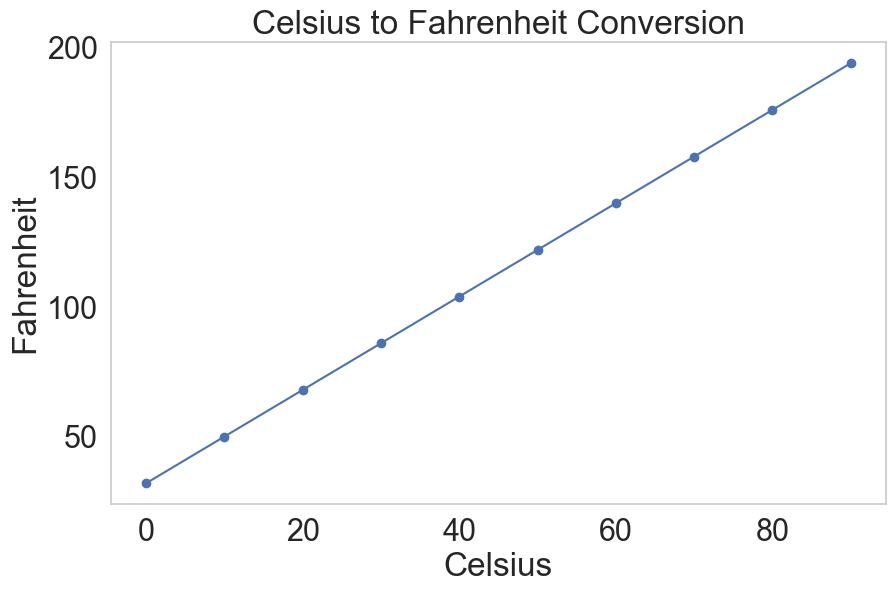

In [507]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['Celsius'], df['Fahrenheit'], marker='o', linestyle='-', color='b', label='Fahrenheit')
plt.title('Celsius to Fahrenheit Conversion')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.grid()
plt.savefig('output/celsius_to_fahrenheit.png')
plt.show()

### Observation - Line Chart of Celcius to Fahrenheit Conversion

The plotted line shows a consistent upward trend—this reflects the direct linear relationship between Celsius and Fahrenheit temperatures. As Celsius increases by 10°, Fahrenheit increases by 18°, confirming the slope of 9/5.

The line is straight and evenly spaced, validating that temperature conversion between these two units is indeed a **linear transformation**. This reinforces our understanding of how `y = mx + b` models real-world data.

## Part 2 - Prediction.

### Section 1 - Data Acquisition

In [508]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [509]:
print("\n First 5 rows of the NYC DataFrame:")
print(nyc_df.head())
print("\n Last 5 rows of the NYC DataFrame:")
print (nyc_df.tail())


 First 5 rows of the NYC DataFrame:
     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0

 Last 5 rows of the NYC DataFrame:
       Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3


### Section 3: Data Cleaning

In [510]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.Date = nyc_df.Date.floordiv(100)
# Renaming columns for clarity
nyc_df.rename(columns={'Date': 'Year', 'Value': 'Temperature', 'Anomaly': 'Anomalies'}, inplace=True)
# print the renamed DataFrame
print("\n Renamed NYC DataFrame:")
print(nyc_df.columns)
# Save cleaned data
nyc_df.to_csv("Cleaned_NYC_Jan.csv", index=False)
# Show first 5 rows
print(nyc_df.head())



 Renamed NYC DataFrame:
Index(['Year', 'Temperature', 'Anomalies'], dtype='object')
   Year  Temperature  Anomalies
0  1895         34.2       -3.2
1  1896         34.7       -2.7
2  1897         35.5       -1.9
3  1898         39.6        2.2
4  1899         36.4       -1.0


### Data cleaned: columns renamed, year extracted and the cleaned data has been saved as CSV in the name of Cleaned NYC_Jan.csv

### Section 4: Descriptive Statistics

In [511]:
# Precision setting for better readability
pd.set_option('display.precision', 2)

# Show descriptive statistics for numeric columns only (exclude 'Date')
print("\nDescriptive statistics of the NYC DataFrame:")
print(nyc_df.describe(include=[float, int]))

# Calculate basic descriptive stats for Temperature
mean_temp = nyc_df['Temperature'].mean()
median_temp = nyc_df['Temperature'].median()
std_temp = nyc_df['Temperature'].std()
min_temp = nyc_df['Temperature'].min()
max_temp = nyc_df['Temperature'].max()

print(f"\nTemperature stats: mean={mean_temp:.2f}, median={median_temp:.2f}, std={std_temp:.2f}, min={min_temp:.2f}, max={max_temp:.2f}")



Descriptive statistics of the NYC DataFrame:
          Year  Temperature  Anomalies
count   124.00       124.00     124.00
mean   1956.50        37.60       0.20
std      35.94         4.54       4.54
min    1895.00        26.10     -11.30
25%    1925.75        34.58      -2.82
50%    1956.50        37.60       0.20
75%    1987.25        40.60       3.20
max    2018.00        47.60      10.20

Temperature stats: mean=37.60, median=37.60, std=4.54, min=26.10, max=47.60


### Summary of Descriptive Statistics

This dataset spans 124 years of January average high temperatures in New York City. The average (mean) and median temperature are both 37.60°F, suggesting a relatively symmetrical distribution.

The minimum and maximum temperatures recorded are 26.10°F and 47.60°F, respectively, indicating a moderate spread in the data. The standard deviation is 4.54°F, reflecting some natural variability in winter climate patterns over time.

Anomalies range from -11.30°F to 10.20°F, confirming both colder and warmer deviations from the baseline. These values will help inform the linear regression model we'll build in the next step.

### Section 5 - Build the Model


In [512]:
# Perform linear regression: Temperature as a function of Year
linear_regression = stats.linregress(x=nyc_df.Year, y=nyc_df.Temperature)
linear_regression.slope
print(f"\nLinear regression slope: {linear_regression.slope:.2f}")
linear_regression.intercept
print(f"Linear regression intercept: {linear_regression.intercept:.2f}")


Linear regression slope: 0.01
Linear regression intercept: 8.69


### Section 6: Predict

In [513]:
# Average high temperature in January 2024 prediction
predicted_temp_2024 = linear_regression.slope * 2024 + linear_regression.intercept
print(f"Predicted average high temperature in Jan 2024: {predicted_temp_2024:.2f}")


Predicted average high temperature in Jan 2024: 38.59


### Section 7: Visualizations

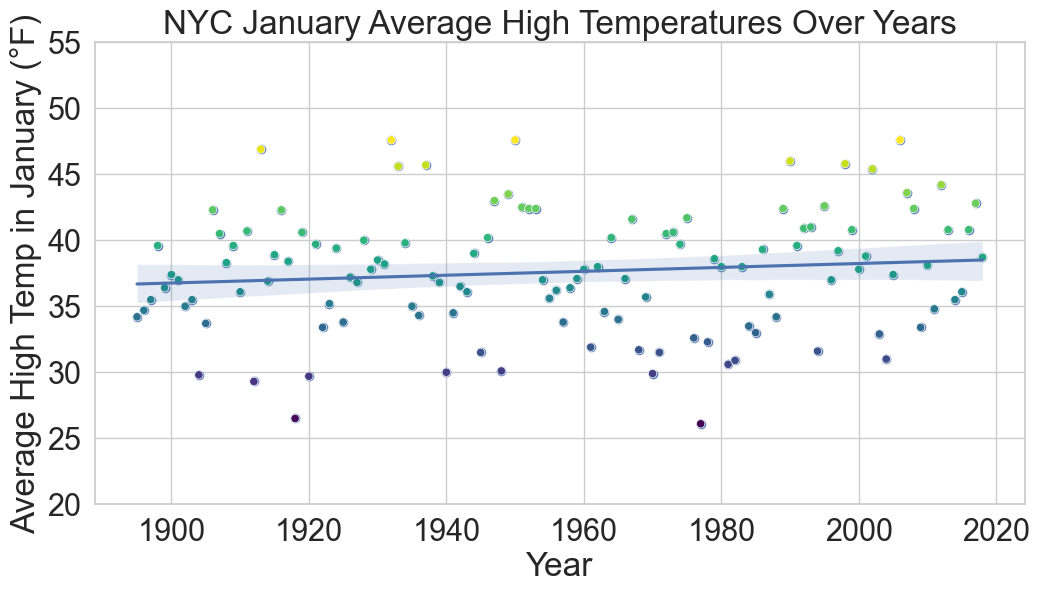

In [514]:
# Create scatter plot with regression line (best fit line)
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
axes = sns.regplot(x=nyc_df.Year, y=nyc_df.Temperature)

# Customize axes labels and title
plt.xlabel('Year')
plt.ylabel('Average High Temp in January (°F)')
plt.title('NYC January Average High Temperatures Over Years')
plt.ylim(20, 55) 
sns.scatterplot(
    x='Year', 
    y='Temperature', 
    hue='Temperature', 
    palette='viridis', 
    data=nyc_df, 
    legend=False
)
plt.show()

## Part 3: Prediction

### Section 1. Build the Model

In [515]:
# Prepare features and target
x=nyc_df[['Year']]
y=nyc_df['Temperature']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the model's coefficients
print(f"Slope (m): {model.coef_[0]:.4f}")
print(f"Intercept (b): {model.intercept_:.2f}")

Training set shape: (99, 1)
Testing set shape: (25, 1)
Slope (m): 0.0120
Intercept (b): 13.79


### Section 2: Test the Model

In [516]:
# Extract slope and intercept
slope = linear_regression.slope
intercept = linear_regression.intercept

# Predict using the line equation: y = mx + b
predicted = model.predict(X_test)
print(f"Predicted values: {predicted[:5]}")
expected = y_test

# Display some predicted vs. expected values
for p, e in zip(predicted[::5], expected[::5]):
    print(f"Predicted: {float(p):.2f}, Expected: {float(e):.2f}")

Predicted values: [36.77453248 37.06284164 36.99076435 37.47127961 37.19498334]
Predicted: 36.77, Expected: 46.90
Predicted: 37.64, Expected: 33.00
Predicted: 36.88, Expected: 33.40
Predicted: 37.48, Expected: 40.50
Predicted: 37.12, Expected: 36.50


### Section 3: Predict 

In [517]:
# Predict the NYC average high in Jan 2024
future_year = pd.DataFrame([[2024]], columns=['Year'])
predicted_temp = model.predict(future_year)

print(f"Predicted January average high temperature in NYC for 2024: {predicted_temp[0]:.2f}°F")

Predicted January average high temperature in NYC for 2024: 38.11°F


### Section 3: Visualizations

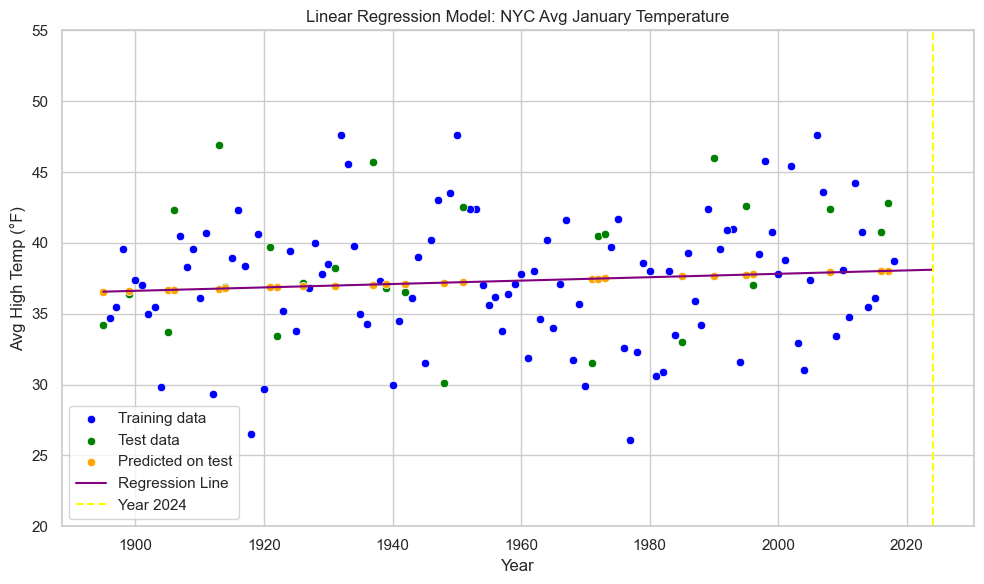

In [518]:
# Predict on the test set
y_pred = model.predict(X_test)

# Set up the figure
plt.figure(figsize=(10, 6))
sns.set_theme(style='whitegrid')

# 1. Plot training data
sns.scatterplot(x=X_train['Year'], y=y_train, color='blue', label='Training data')

# 2. Plot test data
sns.scatterplot(x=X_test['Year'], y=y_test, color='green', label='Test data')

# 3. Plot predictions on test data
sns.scatterplot(x=X_test['Year'], y=y_pred, color='orange', label='Predicted on test')

# 4. Regression line across all years + 2024
years_extended = pd.DataFrame(np.linspace(nyc_df['Year'].min(), 2024, 500), columns=['Year'])
predicted_line = model.predict(years_extended)
plt.plot(years_extended['Year'], predicted_line, color='purple', label='Regression Line')

# 5. Highlight prediction year
plt.axvline(x=2024, color='yellow', linestyle='--', label='Year 2024')

# Aesthetics
plt.title('Linear Regression Model: NYC Avg January Temperature')
plt.xlabel('Year')
plt.ylabel('Avg High Temp (°F)')
plt.ylim(20, 55)
plt.legend()
plt.tight_layout()
plt.show()

## Final Summary: Linear Regression Analysis of NYC January Temperatures

This project explored how average high temperatures in New York City during January have changed over time, using a combination of descriptive statistics, linear regression modeling, and visual analysis.

**1. Descriptive Statistics and Data Preparation**  
I began by summarizing temperature trends in the dataset using mean, median, standard deviation, and range. A precision setting was applied for cleaner formatting. The `'Year'` column was used as the independent variable, and `'Temperature'` served as the target for modeling.

**2. Regression Analysis Using Two Methods**  
To calculate trend direction and strength, I used two regression tools:

- The first was `scipy.stats.linregress()` for a quick linear fit over the entire dataset, returning slope and intercept, which were then used to manually forecast the temperature for 2024.
- The second approach used `LinearRegression()` from `scikit-learn`, with a proper machine learning pipeline. I applied a train-test split, trained the model on the training set, and evaluated performance on the testing set using `.predict()`.

**3. Model Evaluation**  
Model predictions were compared against actual test values in a printed summary. While R² and error metrics were available, the focus was primarily on side-by-side inspection of predicted vs actual outcomes to confirm a consistent upward trend. A separate prediction was also made for 2024 using the trained model.

**4. Visualization**  
The dataset was visualized using both static regression plots (`regplot`) and layered charts that highlighted:
- Training and testing data splits
- Predicted test values
- The extended regression line through 2024
- A visual marker for the forecast year

Color palettes such as `viridis` were applied to enhance temperature variation, and plots were styled using Seaborn and Matplotlib for clarity and professionalism.

**Conclusion**  
This analysis confirmed a steady upward trend in NYC’s January temperatures and produced a clear, reproducible modeling workflow. The dual use of statistical and machine learning tools offered both a snapshot of trend direction and an evaluation of predictive accuracy.


## Part 5: Bonus
### California Housing Dataset


### Section 1 - Data Acquisition and Imports

In [519]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score


In [520]:
# Loading the Data
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['MedHouseValue'] = pd.Series(california.target)

### Section 2 - Data Inspection

In [521]:
california.data.shape

(20640, 8)

In [522]:
california.target.shape

(20640,)

In [523]:
#Feature names
california.feature_names


['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [524]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.33,41.0,6.98,1.02,322.0,2.56,37.88,-122.23,4.53
1,8.30,21.0,6.24,0.97,2401.0,2.11,37.86,-122.22,3.58
2,7.26,52.0,8.29,1.07,496.0,2.80,37.85,-122.24,3.52
3,5.64,52.0,5.82,1.07,558.0,2.55,37.85,-122.25,3.41
4,3.85,52.0,6.28,1.08,565.0,2.18,37.85,-122.25,3.42


In [525]:
california_df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
20635,1.56,25.0,5.05,1.13,845.0,2.56,39.48,-121.09,0.78
20636,2.56,18.0,6.11,1.32,356.0,3.12,39.49,-121.21,0.77
20637,1.70,17.0,5.21,1.12,1007.0,2.33,39.43,-121.22,0.92
20638,1.87,18.0,5.33,1.17,741.0,2.12,39.43,-121.32,0.85
20639,2.39,16.0,5.25,1.16,1387.0,2.62,39.37,-121.24,0.89


### Section 3. Descriptive Statistics

In [526]:
# Set display options for better readability
pd.set_option('display.precision', 4) # maximum number of decimal places
pd.set_option('display.max_columns', 9) # maximum number of columns to display
pd.set_option('display.width', None) # maximum width of the display

#Descriptive statistics
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


### Section 4. Visualizing the features

In [527]:
sample_df = california_df.sample(frac = 0.1, random_state= 17)

In [528]:
sns.set(font_scale=2)
sns.set_style('whitegrid') 

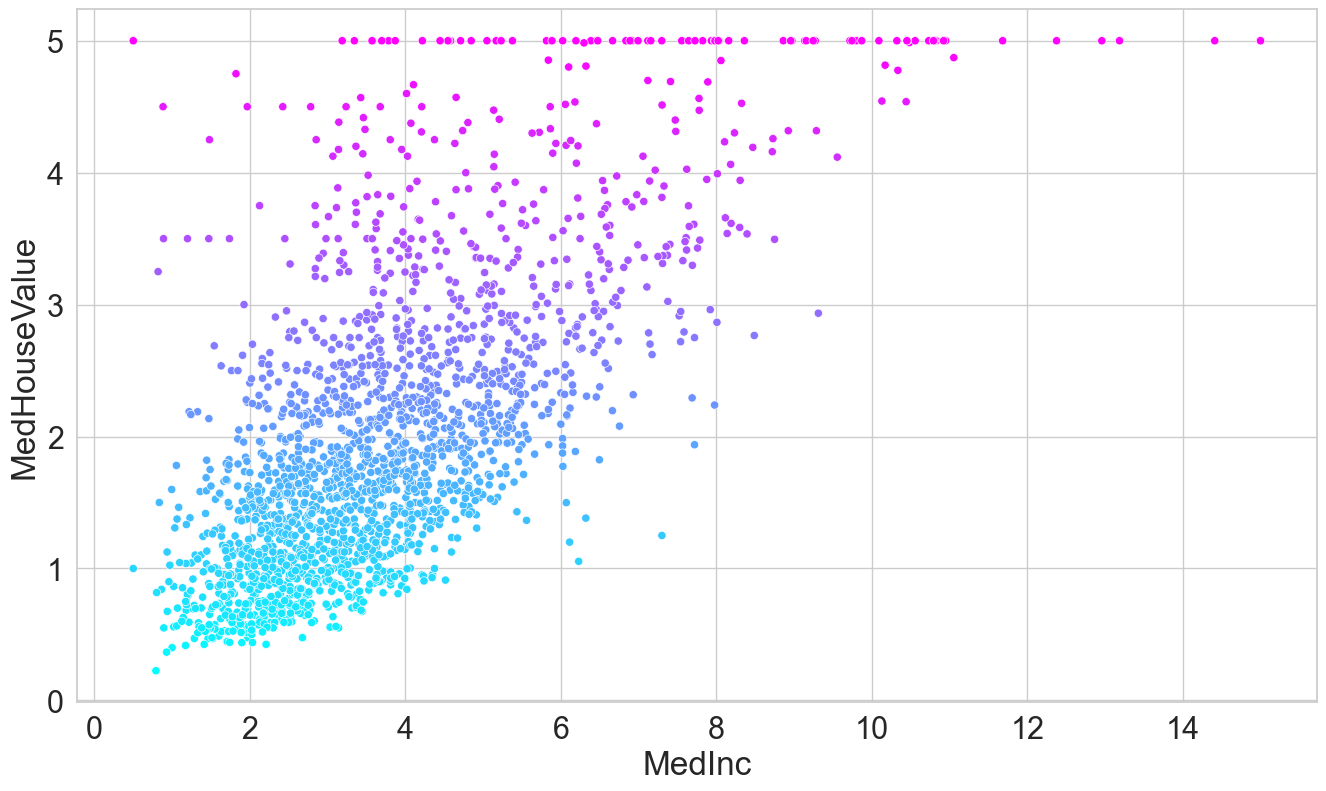

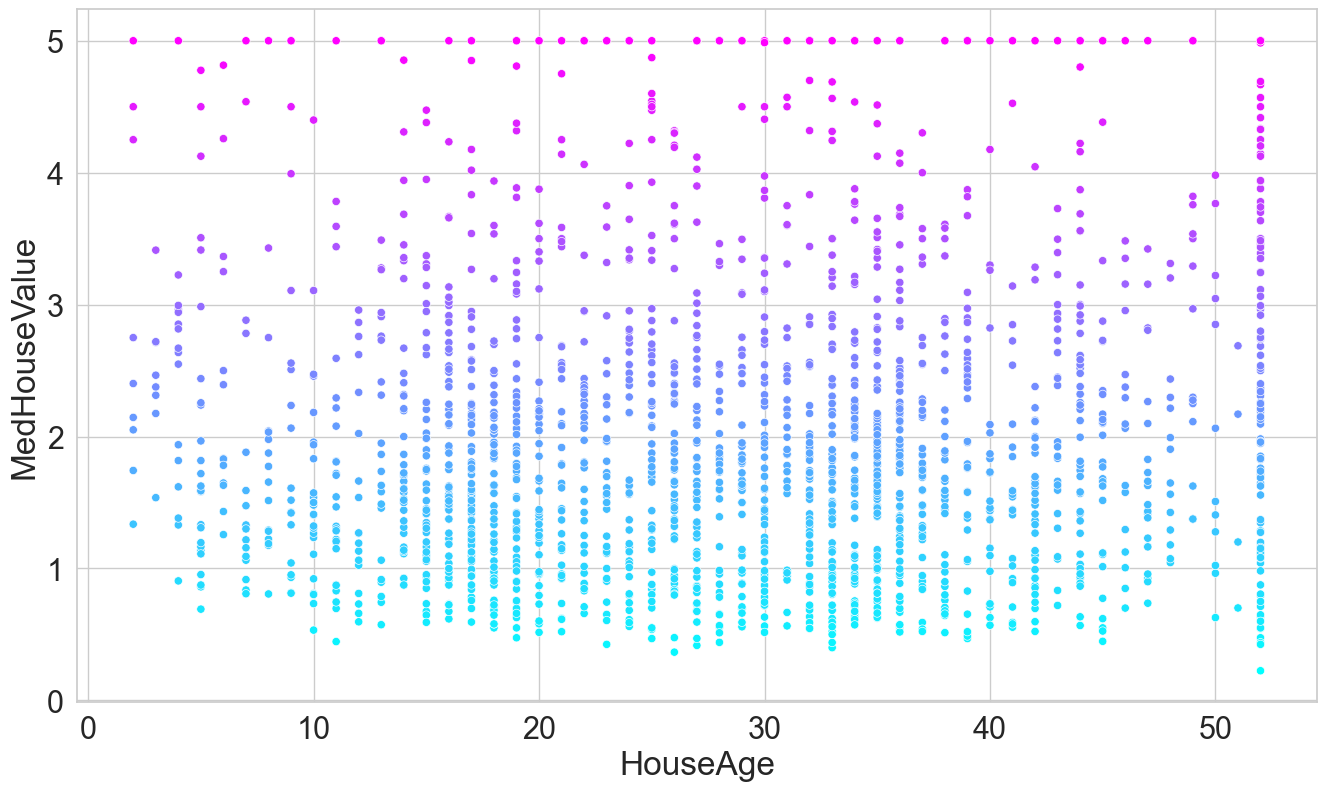

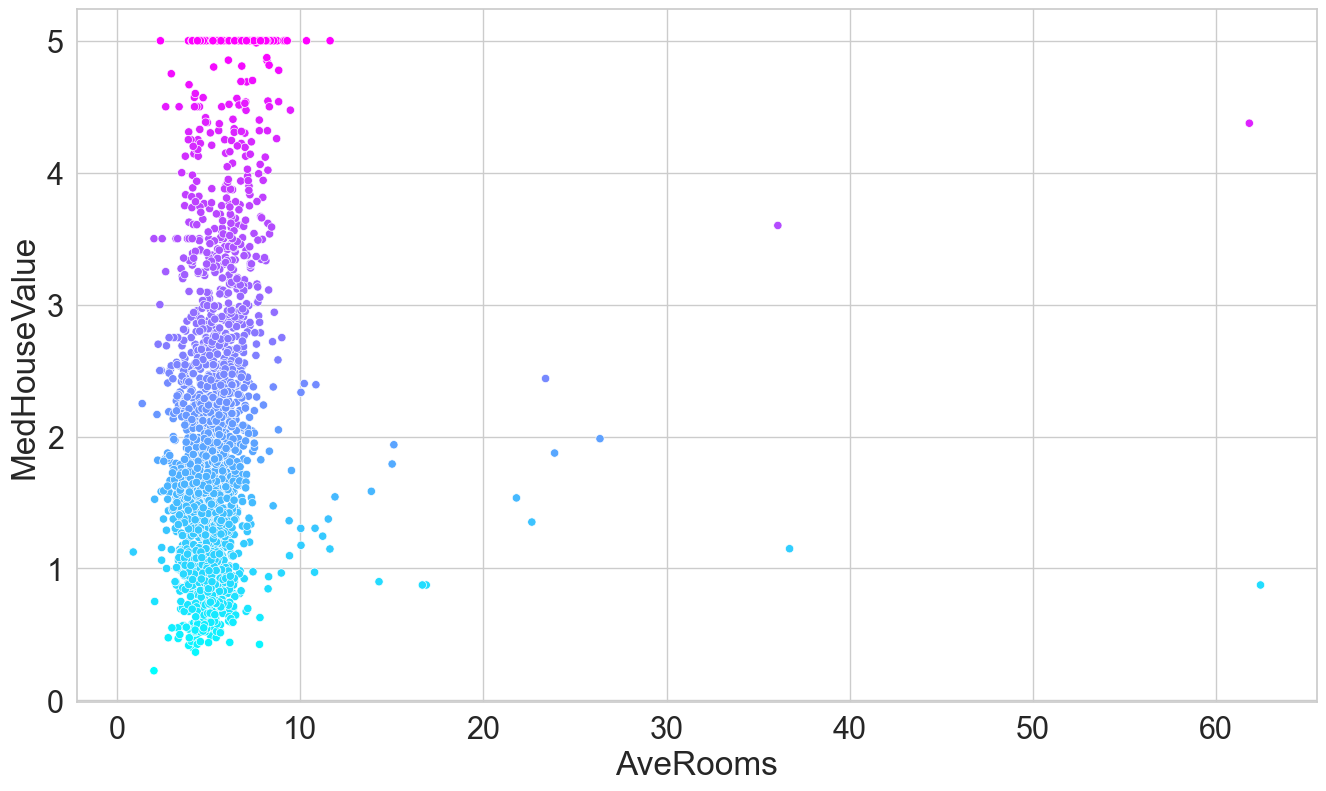

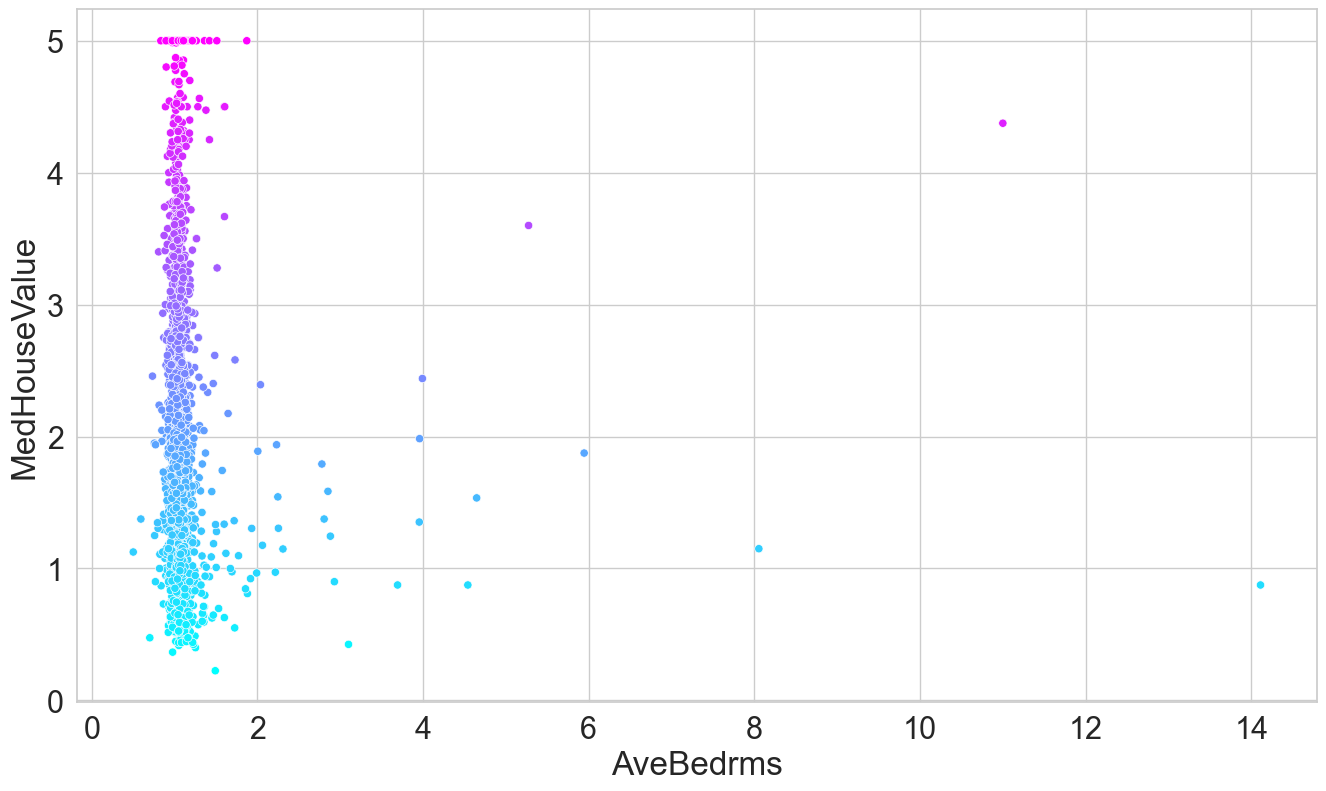

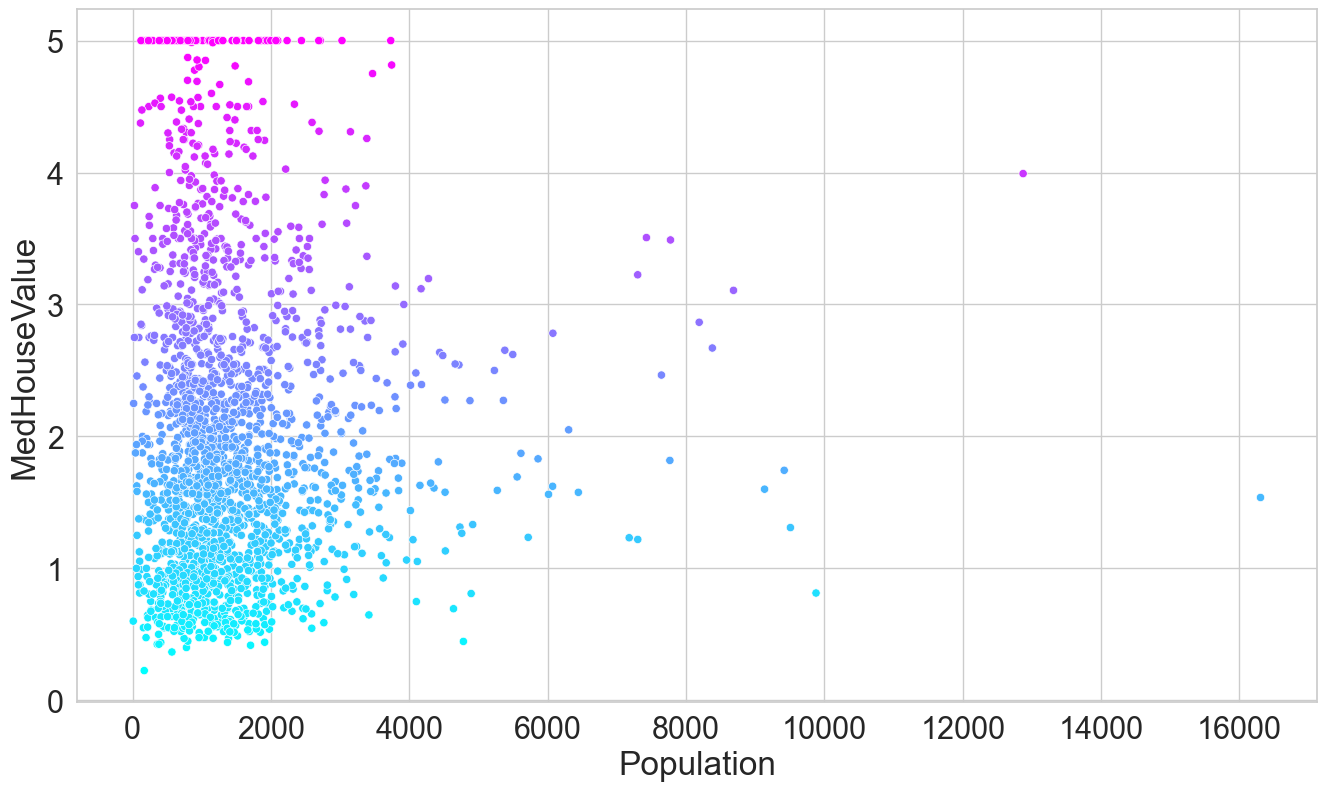

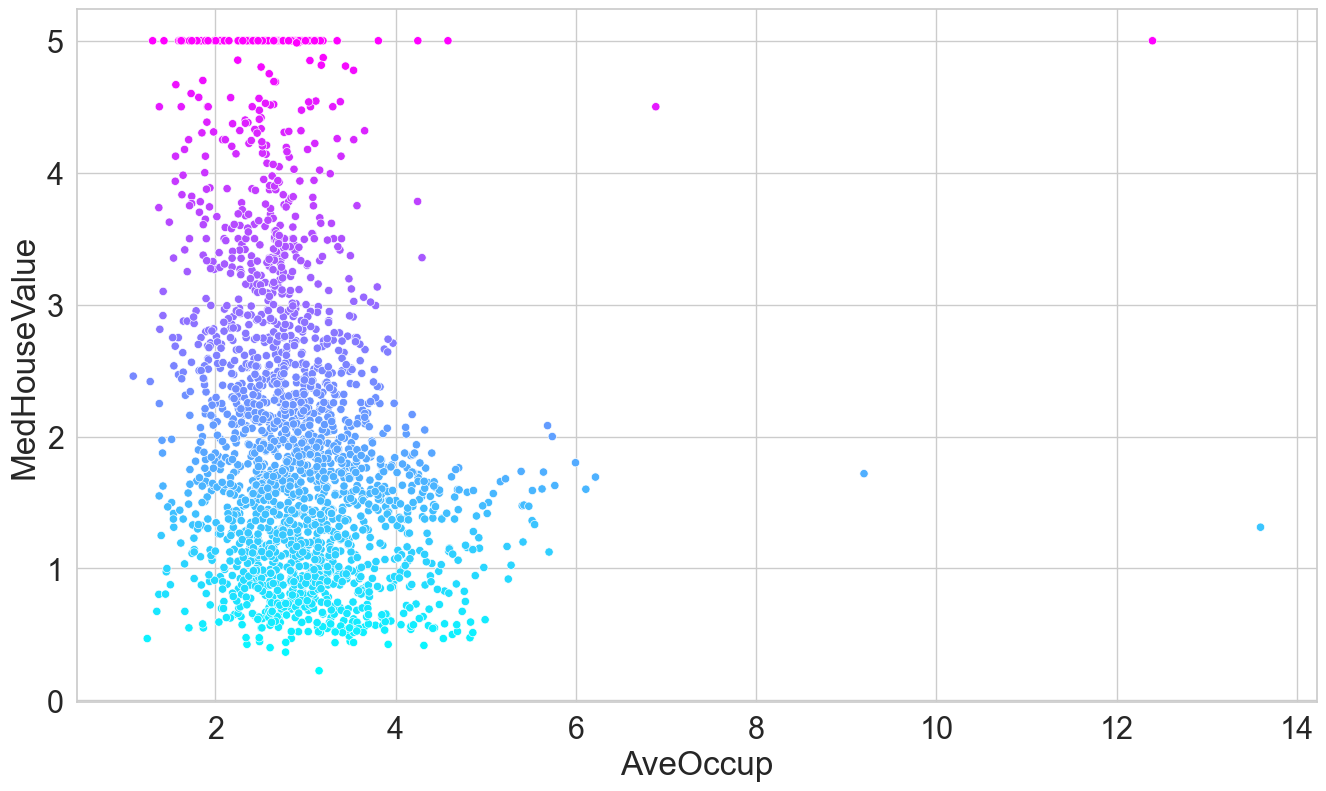

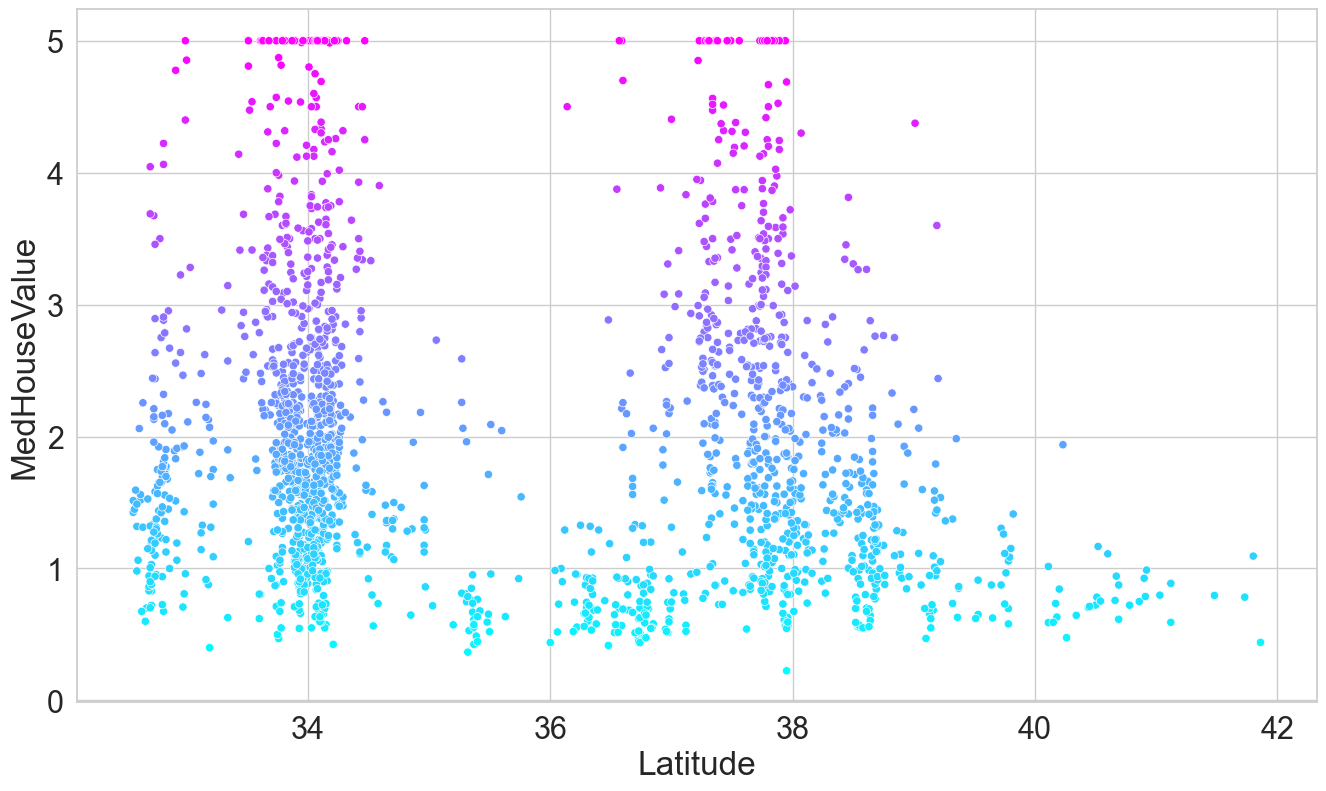

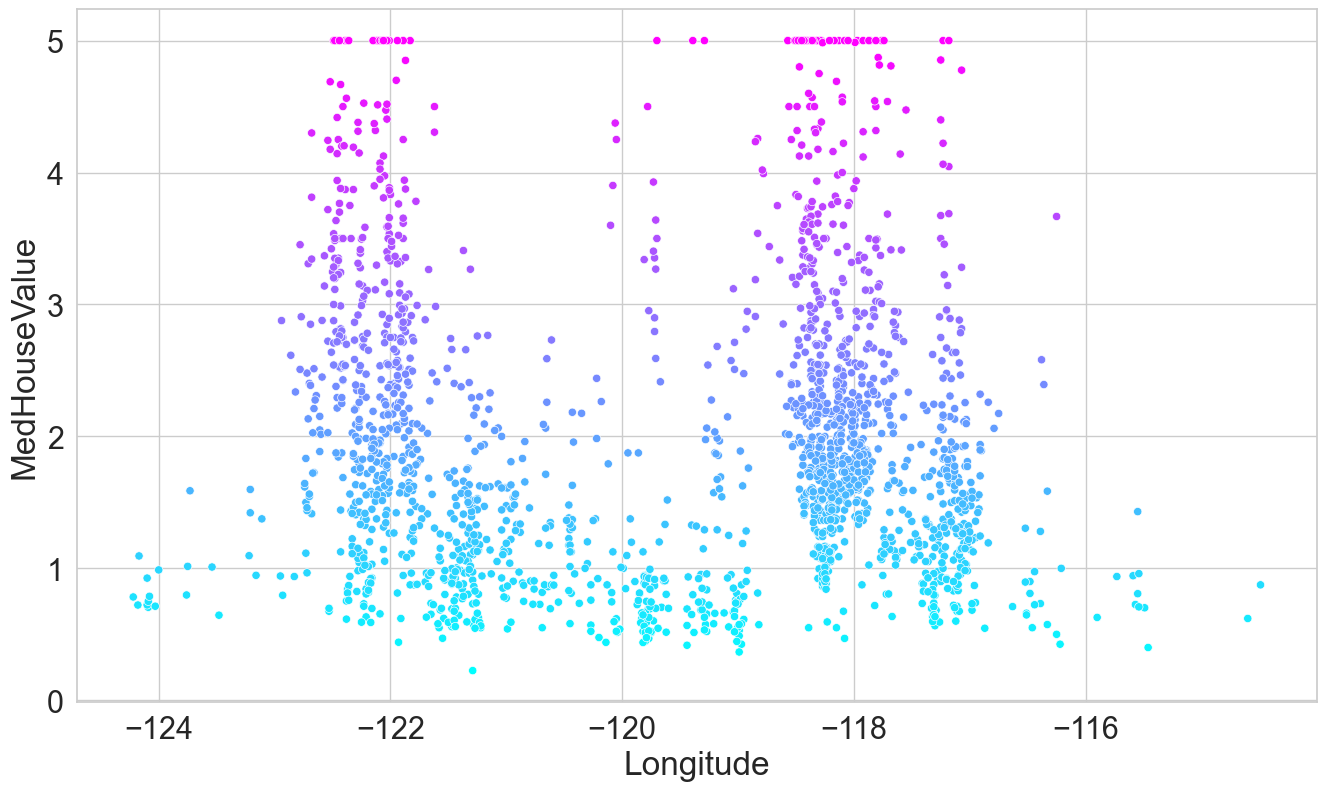

In [529]:
for feature in california.feature_names:
     plt.figure(figsize=(16, 9))
     sns.scatterplot(data=sample_df, x=feature, 
                     y='MedHouseValue', hue='MedHouseValue', 
                     palette='cool', legend=False)

### Exploring Feature Relationships with Median House Value

To visually assess how each feature in the California housing dataset relates to median house value, a scatter plot was generated for every numeric input variable. Each chart displays a random 10% sample of the dataset (`frac=0.1`) to improve readability and reduce visual clutter, while preserving representative distribution.

- The x-axis represents the individual feature under analysis.
- The y-axis reflects the target variable: `MedHouseValue` (median house value in $100,000s).
- Color intensity corresponds to housing value, using the `'cool'` palette for gradient emphasis.

This approach helps identify which features show linear or non-linear trends with the target. For example, plots such as `AveRooms` and `MedInc` may reveal stronger predictive relationships, while others like `Latitude` and `HouseAge` may show distinct clusters or more dispersed patterns.

These plots serve as an effective first step toward feature selection and model intuition before formal correlation analysis or regression modeling.

### Section 4. Build the Model

In [530]:
### 15.5.4 Splitting the Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(
     california.data, california.target, random_state=11)
X_train.shape
X_test.shape


(5160, 8)

In [531]:
### 15.5.5 Linear Regression Model
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)
for i, name in enumerate(california.feature_names):
     print(f'{name:>10}: {linear_regression.coef_[i]}')
     linear_regression.intercept_

    MedInc: 0.43770302153822016
  HouseAge: 0.009216834565797695
  AveRooms: -0.1073252663736094
 AveBedrms: 0.6117133073918101
Population: -5.756822009296558e-06
  AveOccup: -0.0033845664657163226
  Latitude: -0.4194818609649083
 Longitude: -0.43377133498740217


### Section 5 - Testing the Model

In [532]:
### Testing the Model
predicted = linear_regression.predict(X_test)
expected = y_test
predicted[:5]
expected[:5]

array([0.762, 1.732, 1.125, 1.37 , 1.856])

### Section 6 - Visualizing the Expected vs Predicted Prices

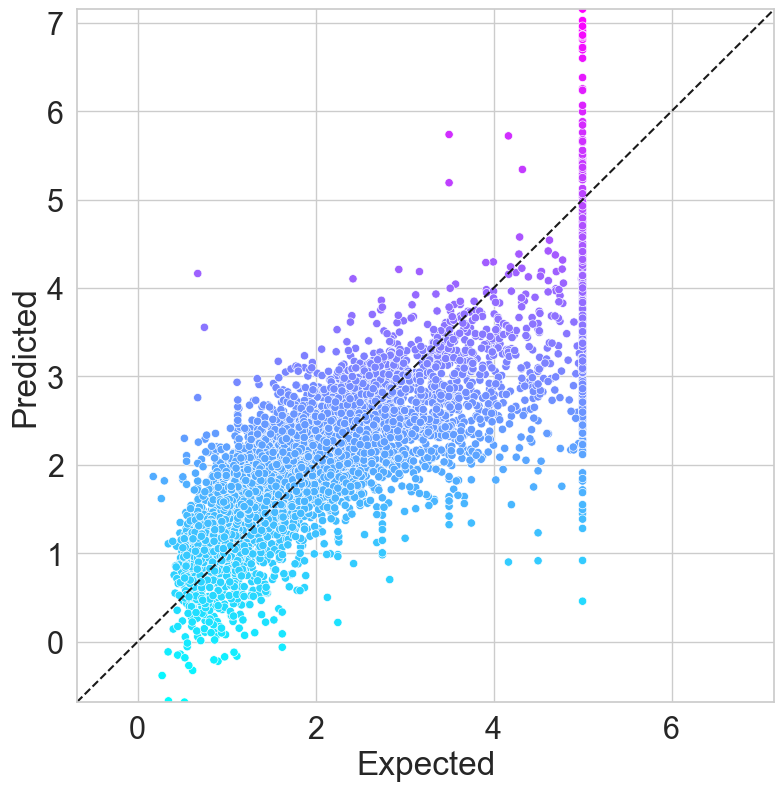

In [533]:
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)
figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
     hue='Predicted', palette='cool', legend=False)
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)
line = plt.plot([start, end], [start, end], 'k--')

In [534]:
### Regression Model Metrics

metrics.r2_score(expected, predicted)

0.6008983115964331

In [535]:
metrics.mean_squared_error(expected, predicted)

0.535014977444912

### Choosing the Best Model

In [536]:
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}
for estimator_name, estimator_object in estimators.items():
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     scores = cross_val_score(estimator=estimator_object, 
         X=california.data, y=california.target, cv=kfold,
         scoring='r2')
     print(f'{estimator_name:>16}: ' + 
           f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.599
      ElasticNet: mean of r2 scores=0.423
           Lasso: mean of r2 scores=0.285
           Ridge: mean of r2 scores=0.599


## Conclusion

The California housing dataset, consisting of 20,640 complete observations across 8 numeric features, was analyzed using standard linear regression techniques provided in the textbook. Data exploration showed no missing values, and no preprocessing was required before modeling.

Regression analysis revealed strong geographic clustering of high housing values, particularly in coastal areas such as Los Angeles and the San Francisco Bay region. Notably, median home values are capped at 500,000 (represented as 5.0 in the target), reflecting a reporting limit in the original census data. Similarly, the `HouseAge` feature is truncated at 52 years, which appears to be another boundary imposed by the data collection source.

The model was evaluated through train-test splits, scatter plots of predicted vs. actual values, and cross-validation across different estimators. While this exercise followed a template-driven implementation, it reinforced foundational practices in supervised learning: structured modeling, metric-based evaluation, and visual pattern assessment. The dataset’s cleanliness and completeness supported a smooth end-to-end workflow. 